<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Assignment: California Housing Price Prediction

*The comments/sections provided are your cues to perform the assignment. You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.*

*If at any point in time you need help on solving this assignment, view our demo video to understand the different steps of the code.*

**Happy coding!**

* * *

# California Housing Price Prediction

__DESCRIPTION__

__Background of Problem Statement:__

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

__Problem Objective :__

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

__Domain:__ Finance and Housing

__Analysis Tasks to be performed:__

1. Build a model of housing prices to predict median house values in California using the provided dataset.


2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.


3. Predict housing prices based on median_income and plot the regression chart for it.

__Tasks:__

1. Load the data :
    * Read the “housing.csv” file from the folder into the program.
    * Print first few rows of this data.
    * Extract input (X) and output (Y) data from the dataset.


2. Handle missing values :
    * Fill the missing values with the mean of the respective column.


3. Encode categorical data :
    * Convert categorical column in the dataset to numerical data.


4. Split the dataset : 
    * Split the data into 80% training dataset and 20% test dataset.


5. Standardize data :
    * Standardize training and test datasets.


6. Perform Linear Regression : 
    * Perform Linear Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print root mean squared error (RMSE) from Linear Regression.
    
    [ HINT: Import mean_squared_error from sklearn.metrics ]
    
    
7. Perform Decision Tree Regression :
    * Perform Decision Tree Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print root mean squared error from Decision Tree Regression.


8. Perform Random Forest Regression :
    * Perform Random Forest Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print RMSE (root mean squared error) from Random Forest Regression.


9. Bonus exercise: Perform Linear Regression with one independent variable :
    * Extract just the median_income column from the independent variables (from X_train and X_test).
    * Perform Linear Regression to predict housing values based on median_income.
    * Predict output for test dataset using the fitted model.
    * Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


__Dataset Description :__
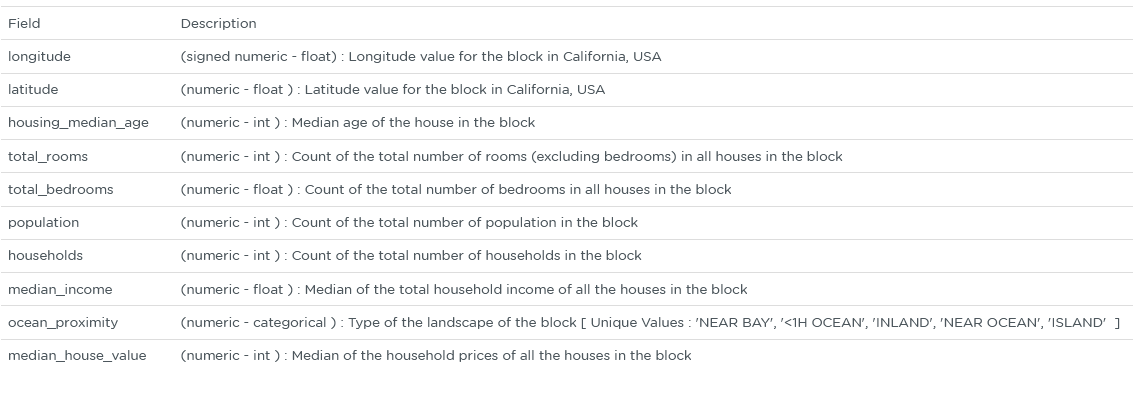

## Load the Dataset

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the “housing.csv” file from the folder into the program.
data=pd.read_excel('housing.xlsx')

In [3]:
#Print first few rows of this data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.shape

(20640, 10)

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

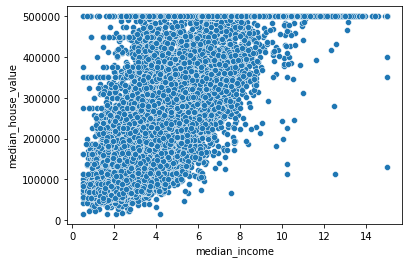

In [6]:
sns.scatterplot(data=data, x='median_income', y='median_house_value')

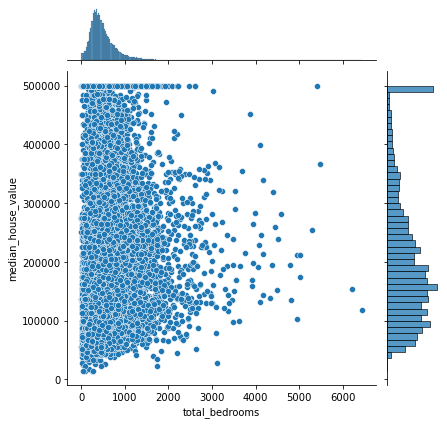

In [7]:
sns.jointplot(data=data,  x='total_bedrooms', y='median_house_value')

## Handle missing values :

In [8]:
#Checking the missing values in dataframe
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
#Fill the missing values with the mean of the respective column
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
data['total_bedrooms']=imputer_mean.fit_transform(data[['total_bedrooms']])

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
#Extract input/Features (X) and output/label (Y) data from the dataset
X = data.iloc[:,:-1]
Y = data.iloc[:,[-1]]

In [12]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [13]:
Y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


## Encode categorical data

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


**Ocean Proximity** is a categorical variable. Let's see what values it contain.

In [15]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
#Convert categorical column in the dataset to numerical data
X_np =np.array(X)

from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder(sparse=False)

ohe_ocean_proximity = Ohe.fit_transform(X_np[:,-1].reshape(-1,1))
ohe_ocean_proximity

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
#Concatenating the onehot encoded columns to the remaining feature(X) columns
concat_array=np.concatenate((ohe_ocean_proximity,X_np[:,:-1]),axis=1)
new_columns=np.concatenate((X.ocean_proximity.unique(),X.columns[:-1]),axis=0)

In [18]:
#Feature dataframe
X_final = pd.DataFrame(concat_array,columns=new_columns)

In [19]:
X_final.head()

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52,1627,280.0,565,259,3.8462


In [20]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NEAR BAY            20640 non-null  object
 1   <1H OCEAN           20640 non-null  object
 2   INLAND              20640 non-null  object
 3   NEAR OCEAN          20640 non-null  object
 4   ISLAND              20640 non-null  object
 5   longitude           20640 non-null  object
 6   latitude            20640 non-null  object
 7   housing_median_age  20640 non-null  object
 8   total_rooms         20640 non-null  object
 9   total_bedrooms      20640 non-null  object
 10  population          20640 non-null  object
 11  households          20640 non-null  object
 12  median_income       20640 non-null  object
dtypes: object(13)
memory usage: 1.0+ MB


## Standardize data 

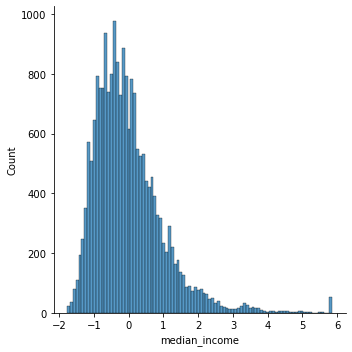

In [21]:
#Standardization of features and label
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

column_names = X_final.columns
scaled_X = scaler.fit_transform(X_final)
scaled_X = pd.DataFrame(scaled_X, columns=column_names)
sns.displot(x=scaled_X['median_income'])

In [22]:
scaled_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NEAR BAY            20640 non-null  float64
 1   <1H OCEAN           20640 non-null  float64
 2   INLAND              20640 non-null  float64
 3   NEAR OCEAN          20640 non-null  float64
 4   ISLAND              20640 non-null  float64
 5   longitude           20640 non-null  float64
 6   latitude            20640 non-null  float64
 7   housing_median_age  20640 non-null  float64
 8   total_rooms         20640 non-null  float64
 9   total_bedrooms      20640 non-null  float64
 10  population          20640 non-null  float64
 11  households          20640 non-null  float64
 12  median_income       20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


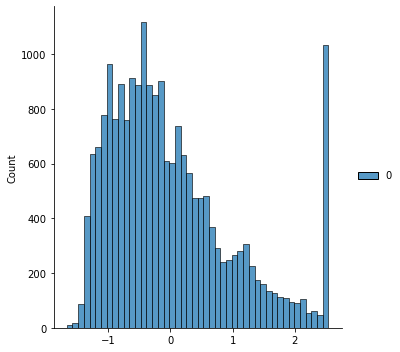

In [23]:
scaled_Y=scaler.fit_transform(Y)
sns.displot(scaled_Y)

##  Split the dataset

In [24]:
#Train Test Split in to 80% and 20%
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_Y,test_size=0.3,random_state=28)

##  Perform Linear Regression

In [25]:
#Perform Linear Regression on training data
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

model_LR.fit(X_train,y_train)
train_score=model_LR.score(X_train,y_train)
test_score=model_LR.score(X_test,y_test)
print('Test score is {}, train score is {} '.format(test_score,train_score))
#Predict output for test dataset using the fitted model
predicted_values=model_LR.predict(X_test)
predicted_values

Test score is 0.6657383389459428, train score is 0.6361722170949844 


array([[-0.51353846],
       [-0.59916565],
       [-0.54176753],
       ...,
       [ 0.28834806],
       [ 0.31879579],
       [-0.46927475]])

In [26]:
#Print root mean squared error (RMSE) from Linear Regression
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, model_LR.predict(X_test)))
print(rmse)

0.5836591471750182


## Perform Decision Tree Regression

In [27]:
#Perform Decision Tree Regression on training data
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()

#Predict output for test dataset using the fitted model
model_DTR.fit(X_train,y_train.ravel())
predictedvalues=model_DTR.predict(X_test)
predictedvalues

array([-0.97281457, -0.94508321, -0.49878161, ...,  0.00644913,
        0.51427968,  0.10264229])

In [28]:
#Print root mean squared error from Decision Tree Regression
rmse = sqrt(mean_squared_error(y_test, model_DTR.predict(X_test)))
print(rmse)

0.5760521826736754


## Perform Random Forest Regression

In [29]:
#Perform Random Forest Regression on training data
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()

#Predict output for test dataset using the fitted model
model_RFR.fit(X_train,y_train.ravel())
predictedvalues=model_RFR.predict(X_test)

In [30]:
#Print root mean squared error from Decision Tree Regression
rmse = sqrt(mean_squared_error(y_test, model_RFR.predict(X_test)))
print(rmse)

0.41919606224545075


## Bonus exercise: Perform Linear Regression with one independent variable

In [31]:
#Extract the median_income column from the independent variables (from X_train and X_test)
median_income_df = data.iloc[:,[-3]]
column_names = median_income_df.columns
scaled_median_income_df = scaler.fit_transform(median_income_df)
scaled_median_income_df = pd.DataFrame(scaled_median_income_df, columns=column_names)

In [32]:
#Perform Linear Regression to predict housing values based on median_income
X_train,X_test,y_train,y_test=train_test_split(scaled_median_income_df,scaled_Y,test_size=0.3,random_state=489)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print(train_score)
print(test_score)

0.4767777846183372
0.4656545996086491


In [34]:
#Predict output for test dataset using the fitted model
y_pred=model.predict(X_test)
y_pred

array([[-0.24944527],
       [-0.23602386],
       [ 0.07026422],
       ...,
       [-0.21517402],
       [ 0.33693402],
       [-0.64394144]])

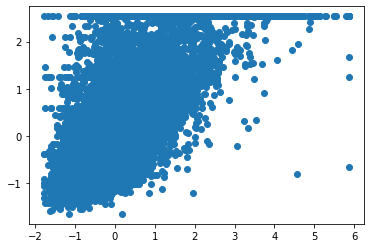

In [35]:
#Plot the fitted model for training data as well as for test data
#check if the fitted model satisfies the test data

#scatter plot of known trained feature data and label data
plt.scatter(X_train,y_train)

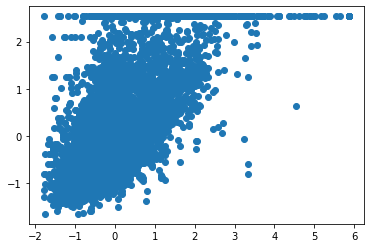

In [36]:
#scatter plot of known test feature data and label data
plt.scatter(X_test,y_test)

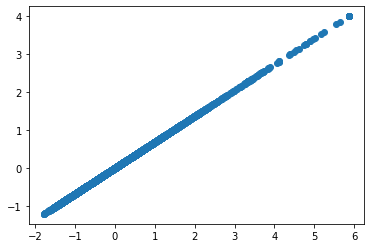

In [37]:
#Plotting the predicted label for unknown test data
plt.scatter(X_test,y_pred)